### Load Libraries

In [1]:
library('tidyverse')
library('Seurat')
library('scCustomize')
library('ggpubr')
library('stringr')
library('colorRamp2')
library('RColorBrewer')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


scCustomize v2.1.2
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/FAQ.html' for citation info.



### Load Files

In [2]:
df <- read.csv("/home/jupyter/CS15_WHBL/CWB_Paper/01_Final_Data/02_Data/B077_3prime/Fig2A_Barplot_metrics_Final.csv")

In [3]:
v3_fully <- readRDS('/home/jupyter/CS15_WHBL/CWB_Paper/01_Final_Data/02_Data/B077_3prime/Fig2BC_v3_Final.rds')
flex_fully <- readRDS('/home/jupyter/CS15_WHBL/CWB_Paper/01_Final_Data/02_Data/exp340/Fig2BC_flex_Final.rds')

v3_fully$sample_tech <- '3Prime'
flex_fully$sample_tech <- 'Flex'

In [31]:
# 

In [32]:
fixed_so <- readRDS('/home/jupyter/CS15_WHBL/CWB_Paper/01_Final_Data/02_Data/2D_exp747/Fig2D_Final.rds')

In [ ]:
fully <- readRDS('/home/jupyter/CS15_WHBL/CWB_Paper/01_Final_Data/02_Data/2E_exp823/Fig2E_Final.rds')

### Color Definitions

In [ ]:
red <- '#F8766D'
blue <- '#619CFF'
green <- '#00A087FF'
yl_or <- '#FAC05E'
grey <- '#CACCD1'
blue2 <- '#65CCEA'
purple <- '#9583BD'

palette <- c(red,blue)
palette2 <- c(blue2,purple)
palette3 <- c(grey,green,blue2,yl_or)
palette4 <- c(grey,purple,green,blue2,yl_or)

### Flex vs 3' Ratio Bar Plot

In [ ]:
df <- df %>% dplyr::filter(variable %in% c("10X 3' v3.1","10X Flex"))
df$variable <- factor(df$variable, levels=c("10X Flex", "10X 3' v3.1"))

In [ ]:
df$rugs <- rep(c('Reads', 'UMIs', 'Genes'), 2)

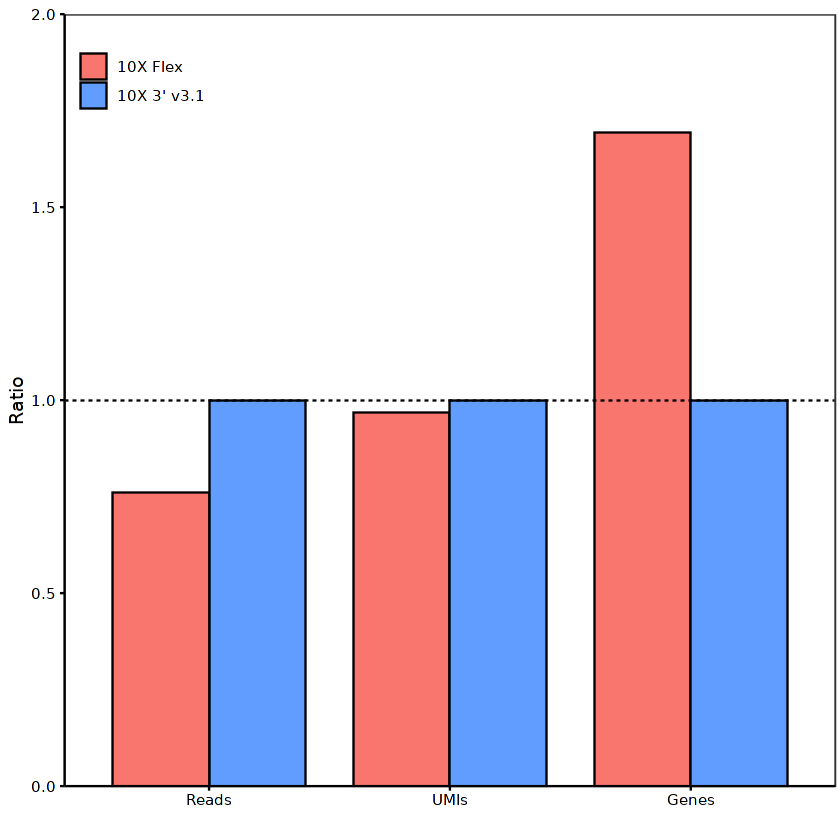

In [ ]:
p <- ggbarplot(df,x = 'rugs', y = 'value',
               fill = 'variable',
               color = 'black',
               width = 0.8,
               position = position_dodge2(padding = 0,reverse = FALSE),
               xlab = "",
               ylab = "Ratio",
               ylim = c(0,2),
               legend.title = "",
               palette = palette,
               ggtheme = theme_bw(base_size=11, base_family = "sans")
              ) +
        theme(axis.line = element_line(color='black'),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               text = element_text(family="sans"),
               plot.margin = margin(0.3,0.1,0.2,0.2, "cm"),
               legend.position = c(0.1, 0.93)) + 
         font("xy.text", color = "black") +
         font("legend.text", color = "black")+
         scale_y_continuous(expand = c(0,0)) +
         geom_hline(yintercept=1,linetype=2) 

p

In [ ]:
pdf("Fig2A.pdf", width = 3.8, height = 2.5, onefile=TRUE)
p
invisible(dev.off())

### Flex vs 3' Split Violin Plots

In [ ]:
# geom_split_violin function

# library(ggplot2)
GeomSplitViolin <- ggproto("GeomSplitViolin", GeomViolin, draw_group = function(self, data, ..., draw_quantiles = NULL){
  data <- transform(data, xminv = x - violinwidth * (x - xmin), xmaxv = x + violinwidth * (xmax - x))
  grp <- data[1,'group']
  newdata <- plyr::arrange(transform(data, x = if(grp%%2==1) xminv else xmaxv), if(grp%%2==1) y else -y)
  newdata <- rbind(newdata[1, ], newdata, newdata[nrow(newdata), ], newdata[1, ])
  newdata[c(1,nrow(newdata)-1,nrow(newdata)), 'x'] <- round(newdata[1, 'x']) 
  if (length(draw_quantiles) > 0 & !scales::zero_range(range(data$y))) {
    stopifnot(all(draw_quantiles >= 0), all(draw_quantiles <= 
                                              1))
    quantiles <- ggplot2:::create_quantile_segment_frame(data, draw_quantiles)
    aesthetics <- data[rep(1, nrow(quantiles)), setdiff(names(data), c("x", "y")), drop = FALSE]
    aesthetics$alpha <- rep(1, nrow(quantiles))
    both <- cbind(quantiles, aesthetics)
    quantile_grob <- GeomPath$draw_panel(both, ...)
    ggplot2:::ggname("geom_split_violin", grid::grobTree(GeomPolygon$draw_panel(newdata, ...), quantile_grob))
  }
  else {
    ggplot2:::ggname("geom_split_violin", GeomPolygon$draw_panel(newdata, ...))
  }
})

geom_split_violin <- function (mapping = NULL, data = NULL, stat = "ydensity", position = "identity", ..., draw_quantiles = NULL, trim = TRUE, scale = "area", na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) {
  layer(data = data, mapping = mapping, stat = stat, geom = GeomSplitViolin, position = position, show.legend = show.legend, inherit.aes = inherit.aes, params = list(trim = trim, scale = scale, draw_quantiles = draw_quantiles, na.rm = na.rm, ...))
}

######################

In [ ]:
flex_df <- flex_fully[[]] %>% select(orig.ident, nFeature_RNA, sample_tech, predicted.celltype.l1)
three_prime_df <- v3_fully[[]] %>% select(orig.ident, nFeature_RNA, sample_tech, predicted.celltype.l1)
full_df <- full_join(flex_df, three_prime_df)
full_df$sample_tech <- gsub('Flex',"10X Flex", full_df$sample_tech)
full_df$sample_tech <- gsub('3Prime',"10X 3' v3.1", full_df$sample_tech)
full_df$orig.ident <- gsub('PB00607-06-01',"Donor 1", full_df$orig.ident)
full_df$orig.ident <- gsub('PB00607',"Donor 1", full_df$orig.ident)
full_df$orig.ident <- gsub('PB00609-06-01',"Donor 2", full_df$orig.ident)
full_df$orig.ident <- gsub('PB00609',"Donor 2", full_df$orig.ident)
full_df$orig.ident <- gsub('PB00610-06-01',"Donor 3", full_df$orig.ident)
full_df$orig.ident <- gsub('PB00610',"Donor 3", full_df$orig.ident)

full_df <- full_df %>% mutate(sample_tech=factor(sample_tech, levels=c("10X Flex","10X 3' v3.1")))



Joining with `by = join_by(orig.ident, nFeature_RNA, sample_tech,
predicted.celltype.l1)`


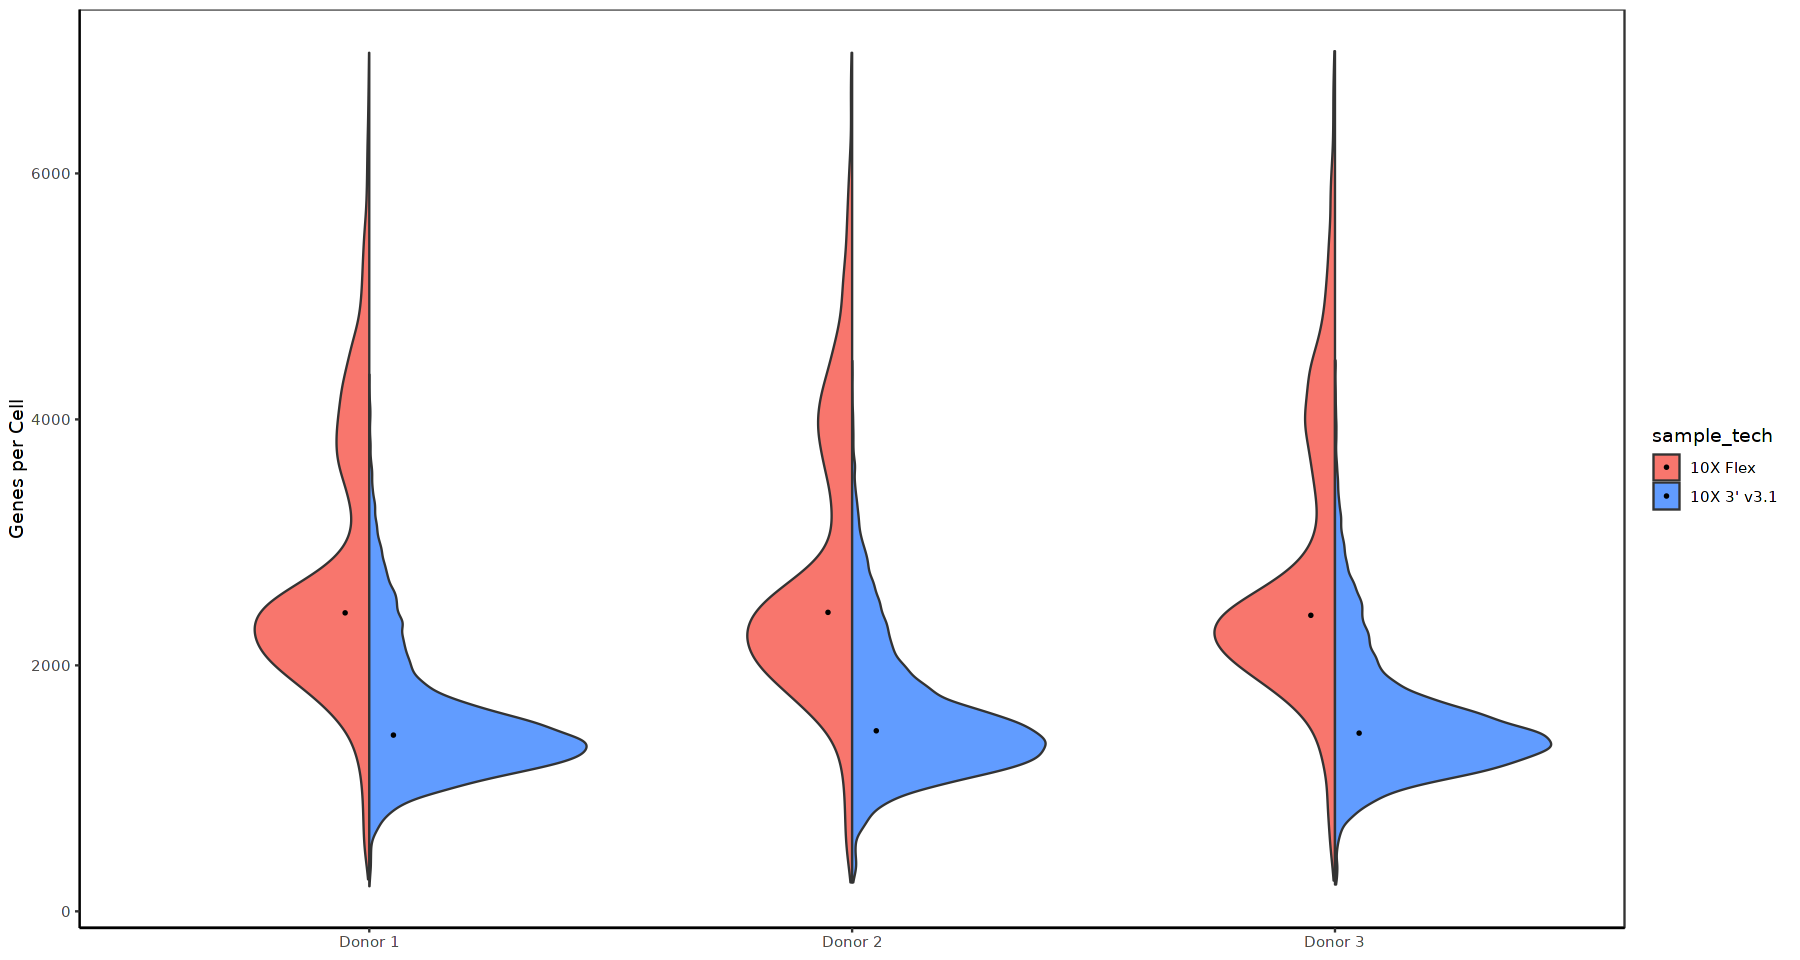

In [ ]:
options(repr.plot.width=15,repr.plot.height=8) 

p <- ggplot(full_df, aes(x = orig.ident, y = nFeature_RNA, fill = sample_tech)) + 
     geom_split_violin(trim = TRUE) +
     scale_fill_manual(values = palette) +
     labs(x=NULL,y="Genes per Cell") +
     stat_summary(fun=median, geom="point", position = position_dodge(0.2),size=0.5, color="black") + 
     theme_bw()+
     theme(axis.line = element_line(color='black'),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               text = element_text(family="sans"),
               plot.margin = margin(0.2,0.3,0.2,0.2, "cm"))

p

In [ ]:
pdf("Fig2B.pdf", width = 6, height = 2.25, onefile=TRUE)
p
invisible(dev.off())

### Flex vs 3' Cell Frequency Correlation Plot

In [ ]:
celltype_prop_multi <- function(so,lvl,metadata){
    metadata_df <- so@meta.data

    donor1_df <- filter(metadata_df,!grepl("PB00607",orig.ident))
    donor2_df <- filter(metadata_df,!grepl("PB00609",orig.ident))
    donor3_df <- filter(metadata_df,!grepl("PB00610",orig.ident))

    if (lvl == 1){counts1 <- dplyr::count(donor1_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts2 <- dplyr::count(donor2_df, predicted.celltype.l1, eval(parse(text=metadata)))}
    if (lvl == 1){counts3 <- dplyr::count(donor3_df, predicted.celltype.l1, eval(parse(text=metadata)))}
   
    if (lvl == 2){counts1 <- dplyr::count(donor1_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts2 <- dplyr::count(donor2_df, predicted.celltype.l2, eval(parse(text=metadata)))}
    if (lvl == 2){counts3 <- dplyr::count(donor3_df, predicted.celltype.l2, eval(parse(text=metadata)))}

    names(counts1)[2] <- metadata
    names(counts2)[2] <- metadata
    names(counts3)[2] <- metadata
    
    # return(counts)
    
    sum_counts1 <- donor1_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts1)[1] <- metadata

    sum_counts2 <- donor2_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts2)[1] <- metadata

    sum_counts3 <- donor3_df %>% dplyr::count(eval(parse(text=metadata)))
    names(sum_counts3)[1] <- metadata
    
    # return(sum_counts)

    joined_counts1 <- left_join(counts1, sum_counts1, by = metadata)
    joined_counts2 <- left_join(counts2, sum_counts2, by = metadata)
    joined_counts3 <- left_join(counts3, sum_counts3, by = metadata)

    # print(head(joined_counts))

    joined_counts1$perc <- joined_counts1$n.x/joined_counts1$n.y
    joined_counts2$perc <- joined_counts2$n.x/joined_counts2$n.y
    joined_counts3$perc <- joined_counts3$n.x/joined_counts3$n.y

    joined_counts1 <- joined_counts1 %>% mutate(orig.ident='PB00607')
    joined_counts2 <- joined_counts2 %>% mutate(orig.ident='PB00609')
    joined_counts3 <- joined_counts3 %>% mutate(orig.ident='PB00610')

    #joined_counts <- left_join(joined_counts1, joined_counts2, joined_counts3, by = c('predicted.celltype.l1', "sample_tech", 'n.x', 'n.y', 'perc', 'orig.ident'))
    #joined_counts <- left_join(joined_counts_temp, joined_counts3, by = metadata)
    joined_counts <- rbind(joined_counts1, joined_counts2, joined_counts3)
    return(joined_counts)
    }

In [ ]:
ct_v3 <- celltype_prop_multi(v3_fully,1,'sample_tech')
ct_flex <- celltype_prop_multi(flex_fully,1,'sample_tech')
ct_rna <- rbind(ct_v3,ct_flex)

ct_rna$sample_tech <- gsub('Flex',"10X Flex", ct_rna$sample_tech)
ct_rna$sample_tech <- gsub('3Prime',"10X 3' v3.1", ct_rna$sample_tech)

ct_rna$orig.ident <- gsub('PB00607-06-01',"Donor 1", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('PB00607',"Donor 1", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('PB00609-06-01',"Donor 2", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('PB00609',"Donor 2", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('PB00610-06-01',"Donor 3", ct_rna$orig.ident)
ct_rna$orig.ident <- gsub('PB00610',"Donor 3", ct_rna$orig.ident)

df <- subset(ct_rna, select = -c(n.x,n.y))
df <- filter(df, predicted.celltype.l1 != "other")
flex_df <- filter(df, sample_tech == "10X Flex") %>% rename(flex.perc=perc) %>% select(-sample_tech)
v3_df <- filter(df, sample_tech == "10X 3' v3.1") %>% rename(v3.perc=perc) %>% select(-sample_tech)
comp_df <- left_join(flex_df, v3_df) %>% relocate(orig.ident, .before = predicted.celltype.l1)
comp_df$predicted.celltype.l1 <- factor(comp_df$predicted.celltype.l1, levels = c("CD4 T", "CD8 T", "other T", "B", "NK", "Mono", "DC", "other"))

Joining with `by = join_by(predicted.celltype.l1, orig.ident)`


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


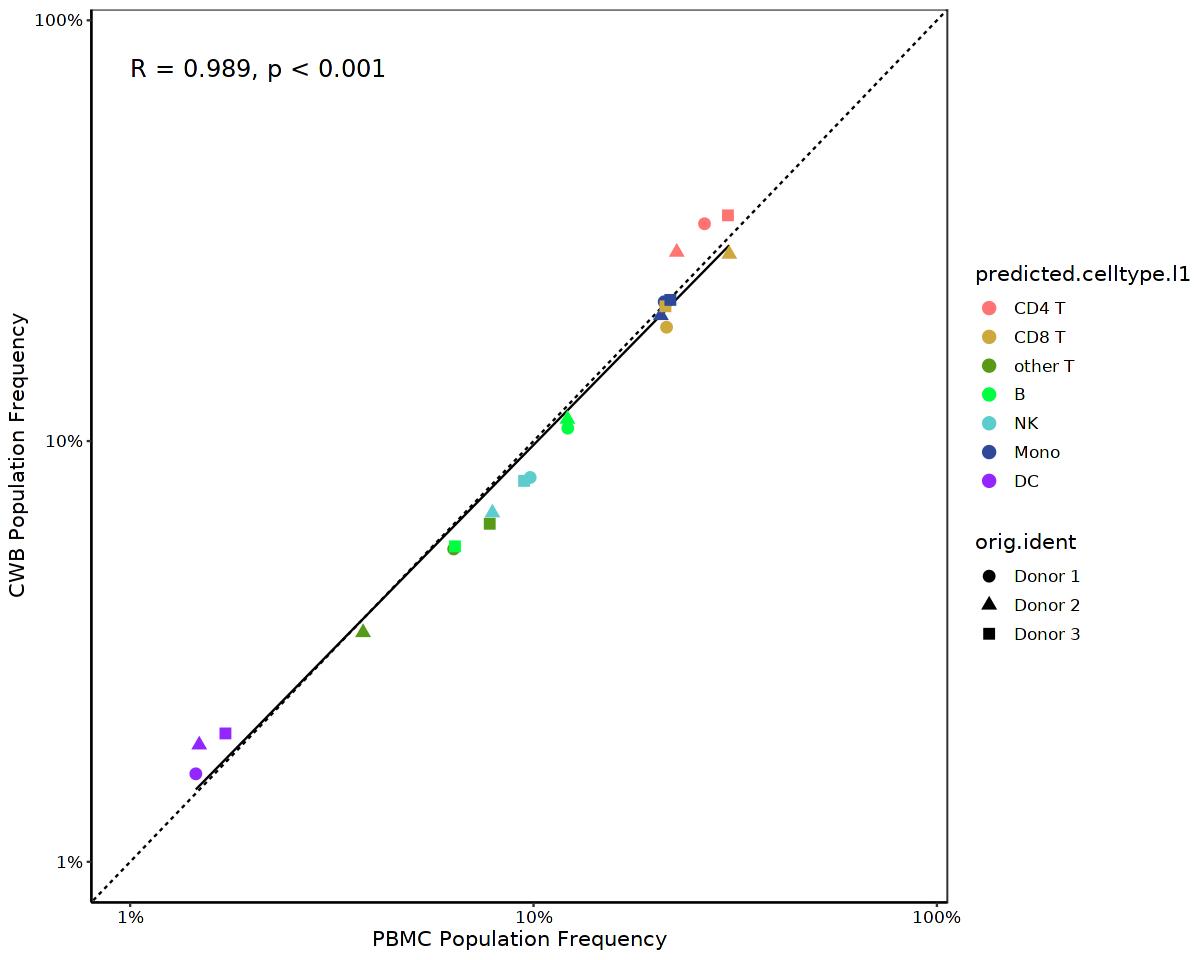

In [ ]:
options(repr.plot.width=10,repr.plot.height=8) 


p <- ggplot(comp_df, aes(x = flex.perc, y = v3.perc, color = predicted.celltype.l1, shape = orig.ident)) +
     geom_abline(slope = 1, linetype = 'dashed', size = 0.5) +
     geom_smooth(inherit.aes = FALSE, aes(x = flex.perc, y = v3.perc), method='lm', se = FALSE, color = "black", linewidth = 0.5) +
     geom_point(size = 3) + 
     scale_color_manual(values = DiscretePalette_scCustomize(num_colors = 8,palette = "varibow")) +
     scale_x_log10(labels = scales::percent, limits = c(0.01,0.85)) +
     scale_y_log10(labels = scales::percent, limits = c(0.01,0.85)) + 
     stat_cor(inherit.aes = FALSE, aes(x = flex.perc, y = v3.perc), size = 5, 
              r.accuracy = 0.001, p.accuracy = 0.001, show.legend = FALSE) +
     xlab("PBMC Population Frequency") +
     ylab("CWB Population Frequency") +
     theme_bw() +    
     theme(
           axis.line = element_line(color='black'),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank(),
           axis.text.x=element_text(colour="black"),
           axis.text.y=element_text(colour="black"),
           text = element_text(family="sans", size = 12),
           plot.margin = margin(0.2,0.2,0.2,0.2, "cm"),
          )

p

In [ ]:
pdf("Fig2C_corr_plot.pdf", width = 6, height = 4, onefile=TRUE)
p
invisible(dev.off())

`geom_smooth()` using formula = 'y ~ x'


In [ ]:

cor.test(comp_df$flex.perc, comp_df$v3.perc, method = "pearson")


	Pearson's product-moment correlation

data:  comp_df$flex.perc and comp_df$v3.perc
t = 20.205, df = 19, p-value = 2.645e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9443007 0.9910125
sample estimates:
      cor 
0.9775123 


### Bead vs FACS Genes Per Cell Split Violin Plot

In [ ]:
fixed_so$sample2 <- gsub('WHBL-1','CWB Donor 1', fixed_so$sample2)
fixed_so$sample2 <- gsub('WHBL-2','CWB Donor 2', fixed_so$sample2)
fixed_so$sample2 <- gsub('WHBL-3','CWB Donor 3', fixed_so$sample2)
fixed_so$sample2 <- gsub('Leukopak','PBMC', fixed_so$sample2)
fixed_so$clean <- gsub('Bead','Magnetic Bead', fixed_so$clean)

fixed_so$sample2 <- factor(fixed_so$sample2, levels=c("PBMC","CWB Donor 1","CWB Donor 2","CWB Donor 3"))
Idents(fixed_so) <- fixed_so$sample2

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



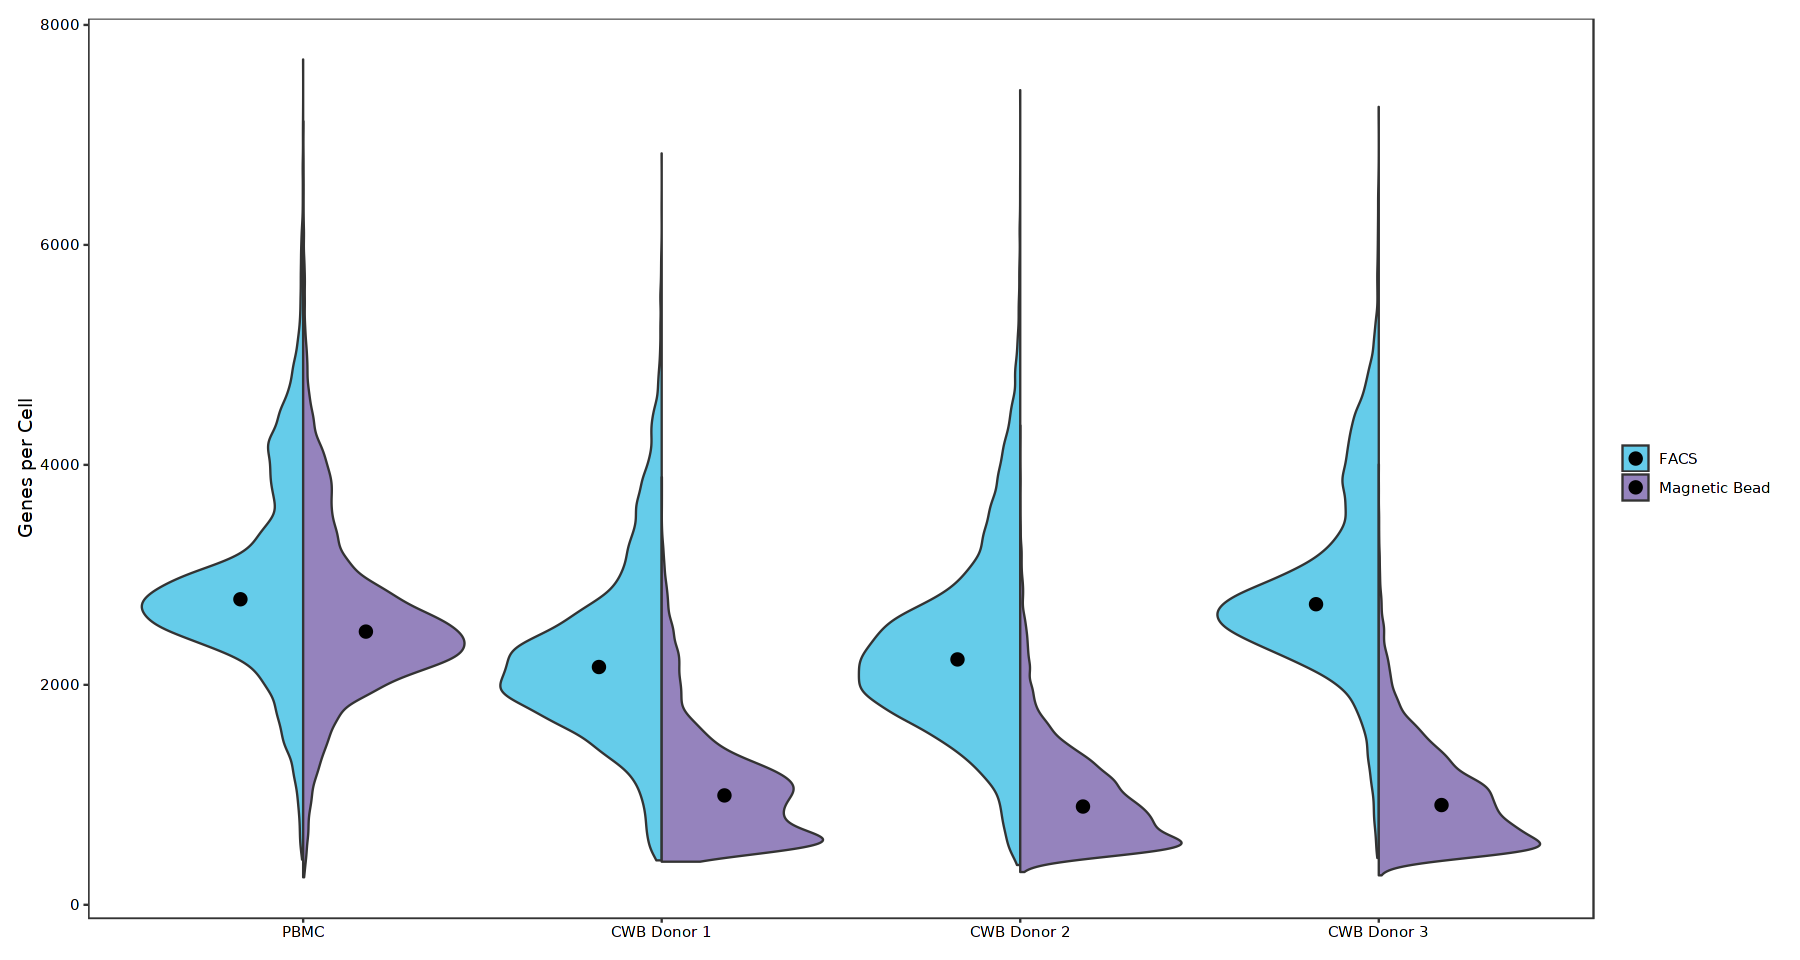

In [ ]:
options(repr.plot.width=15,repr.plot.height=8) 

p <- subset(fixed_so, subset=nCount_RNA<50000) %>% 
    VlnPlot(features = "nFeature_RNA", ncol = 1,pt.size=0, split.by='clean', split.plot=TRUE, cols=palette2) +
    stat_summary(fun=median, geom="point", position = position_dodge(0.7),size=3, color="black") +
    labs(x=NULL,y="Genes per Cell",color = '10X Chemistry') + 
    theme_bw(base_size = 11) +
    theme(
        plot.title = element_blank(),
        axis.text = element_text(color= 'black'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text = element_text(family="sans"),
        plot.margin = margin(0.2,0.3,0.2,0.2, "cm"))


p

In [ ]:
pdf("Fig2D.pdf", width = 7, height = 4, onefile=TRUE)
p
invisible(dev.off())

### Bead Enrichment Method Violin Plots

In [ ]:
fully$desc <- fully$orig.ident
fully$desc <- gsub('Exp00823_w2_BL05731_Bead_Enrichment','CWB 2 Round Magnetic Bead', fully$desc)
fully$desc <- gsub('Exp00823_w2_BL05731_No_Enrichment','CWB No Enrichment', fully$desc)
fully$desc <- gsub('Exp00823_w2_BL05731_FACS','CWB FACS', fully$desc)
fully$desc <- gsub('Exp00823_w2_PB04745_FACS','Isolated PBMC FACS', fully$desc)
fully$desc <- factor(fully$desc, levels = c('CWB No Enrichment','CWB 2 Round Magnetic Bead','CWB FACS','Isolated PBMC FACS'))

fully_df <- fully[[]]

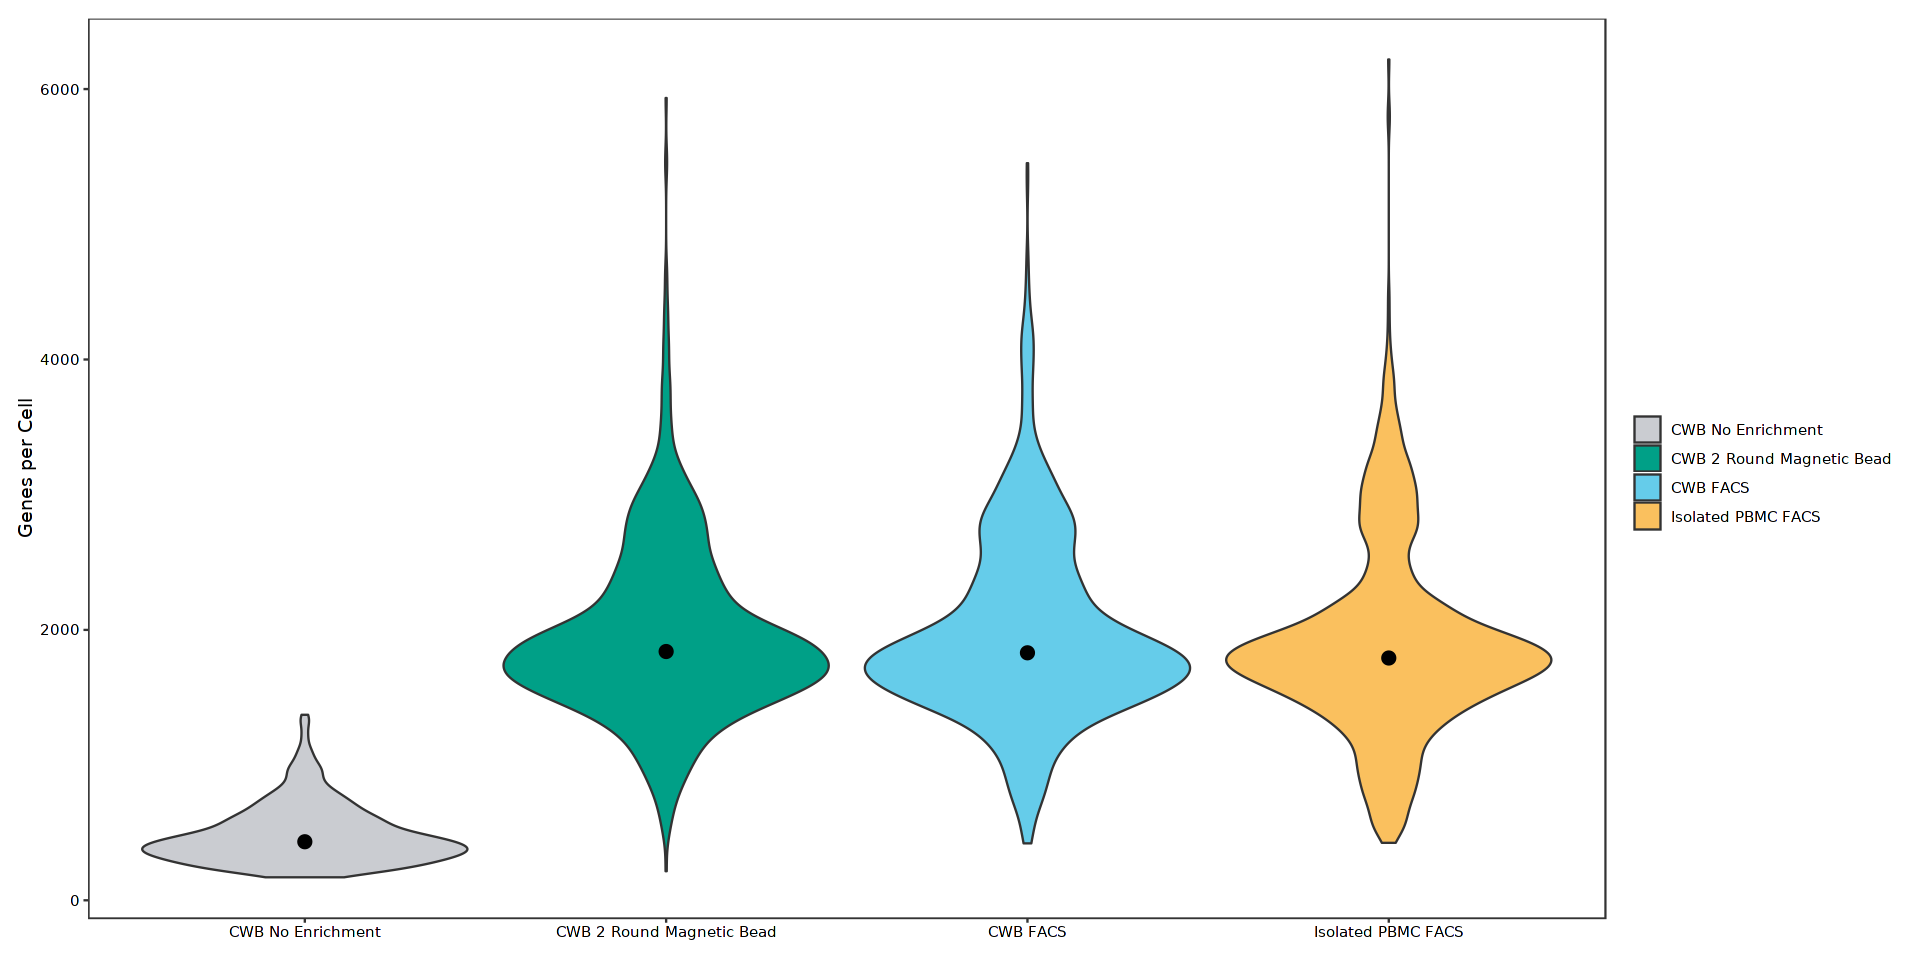

In [ ]:
options(repr.plot.width=16,repr.plot.height=8) 

Idents(fully)<-'desc' 

p <- VlnPlot(fully, features = "nFeature_RNA", ncol = 1, pt.size=0, cols = palette3) +
    stat_summary(fun=median, geom="point", size=5, color="black", fill="black", shape=20) +
    labs(x = NULL, y = "Genes per Cell") +
    theme_bw(base_size = 11) +
    theme(
        plot.title = element_blank(),
        axis.text = element_text(color= 'black'),
        # axis.text.x = element_text(vjust = 1, hjust = 19),              
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text = element_text(family="sans"),
        plot.margin = margin(0.2,0.3,0.2,0.2, "cm"))

p

### Bead Enrichment Method Violin Plots ALTERNATE

In [ ]:
df_823 <- fully[[]]
df_747 <- fixed_so[[]]

In [ ]:
df_747<-df_747%>%mutate(desc = case_when(
  orig.ident=='BL05012_Bead_Fix' ~ 'CWB 1 Bead Magnetic Bead',
  orig.ident=='BL05012_FACS_Fix' ~ 'CWB FACS 1',
  orig.ident=='BL05044_Bead_Fix' ~ 'CWB 1 Bead Magnetic Bead 2',
  orig.ident=='BL05044_FACS_Fix' ~ 'CWB FACS 2',
  orig.ident=='BL05045_Bead_Fix' ~ 'CWB 1 Bead Magnetic Bead 3',
  orig.ident=='BL05045_FACS_Fix' ~ 'CWB FACS 3',
  orig.ident=='PB04745_Bead_Fix' ~ 'PBMC 1 Bead Magnetic Bead',
  orig.ident=='PB04745_FACS_Fix' ~ 'PBMC FACS 2',
  ))

In [ ]:
common_cols <- intersect(colnames(df_747), colnames(df_823))
fig2d_df <- bind_rows(
  df_747 %>% select({common_cols}), 
  df_823 %>% select({common_cols})
)

cond <- c('CWB No Enrichment', 'CWB 1 Bead Magnetic Bead', 'CWB 2 Round Magnetic Bead', 'CWB FACS', 'Isolated PBMC FACS')
df <- filter(fig2d_df,desc %in% cond)

df$desc <- factor(df$desc, levels = c('CWB No Enrichment', 'CWB 1 Bead Magnetic Bead', 'CWB 2 Round Magnetic Bead', 'CWB FACS', 'Isolated PBMC FACS'))

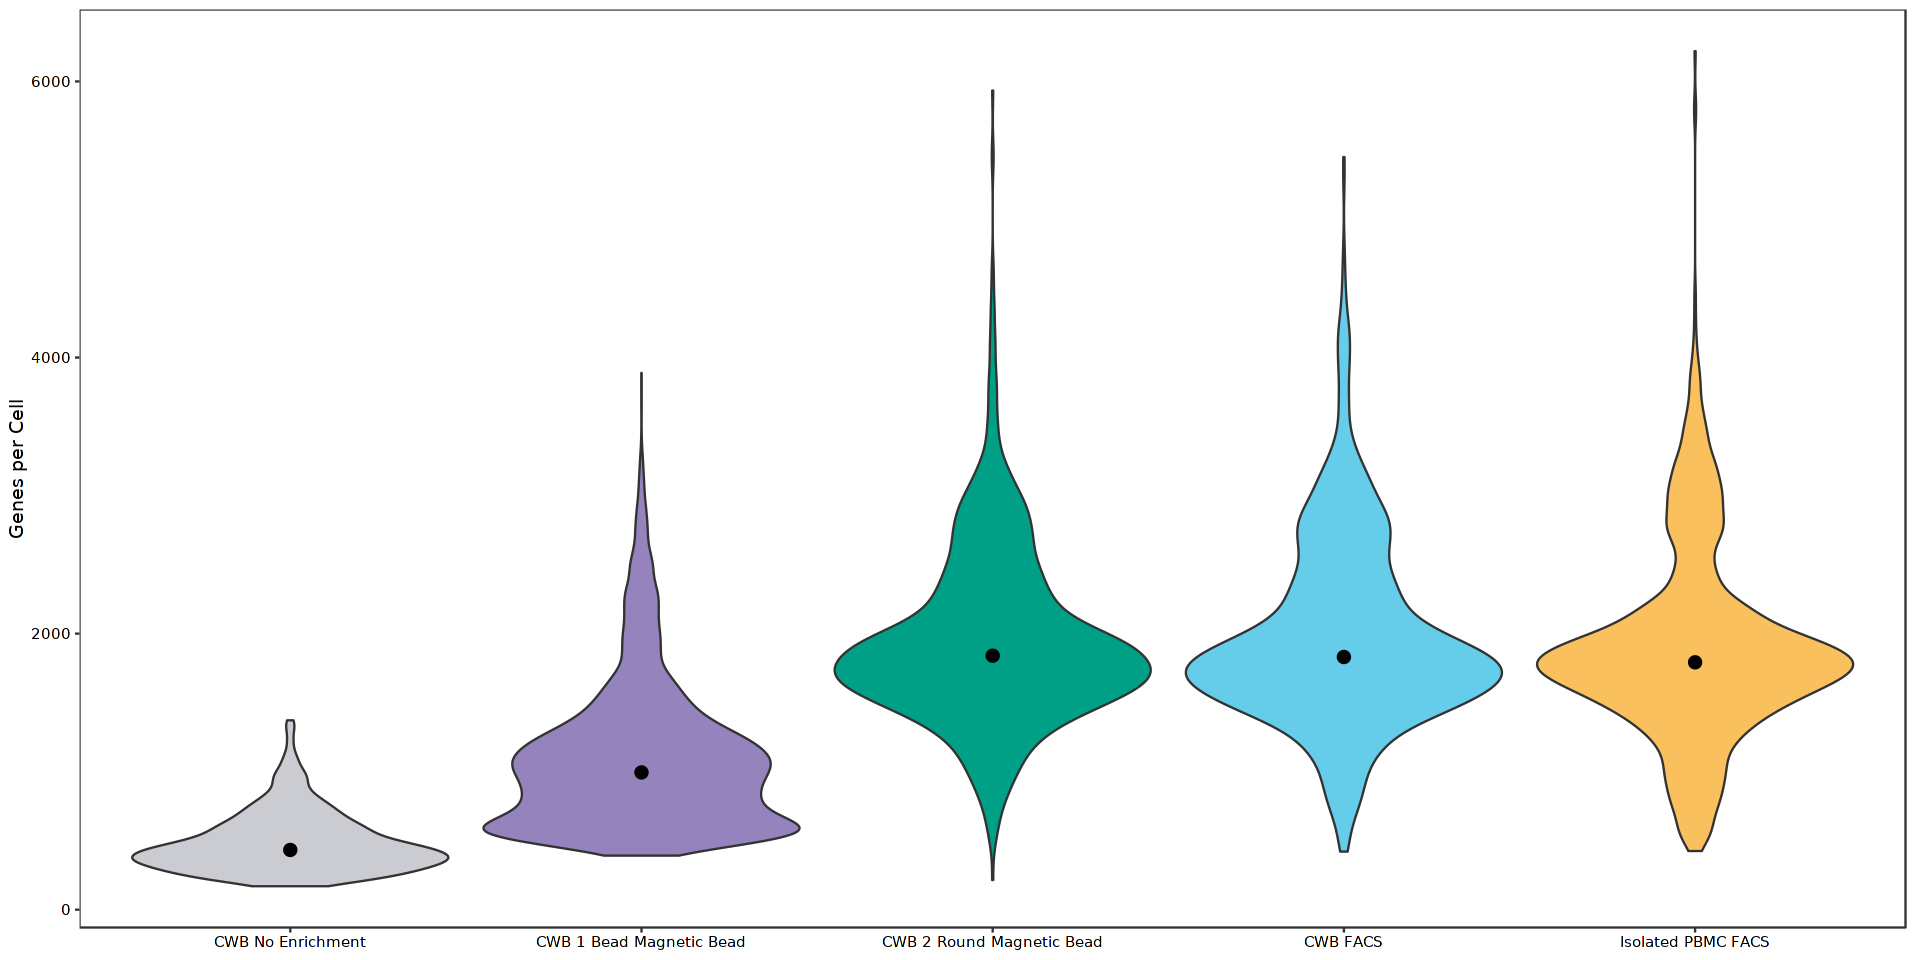

In [ ]:
options(repr.plot.width=16,repr.plot.height=8) 

p <- ggplot(df, aes(desc, nFeature_RNA, fill = desc)) + geom_violin(scale = "width") + scale_fill_manual(values = palette4) + 
     stat_summary(fun=median, geom="point", position = position_dodge(0.7),size=3, color="black") +
     labs(x = NULL, y = "Genes per Cell") +
     theme_bw(base_size = 11) +
     theme(
        plot.title = element_blank(),
        axis.text = element_text(color= 'black'),
        legend.position = "none",
        # axis.text.x = element_text(vjust = 1, hjust = 19),              
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text = element_text(family="sans"),
        plot.margin = margin(0.2,0.3,0.2,0.2, "cm"))

p

In [ ]:
pdf("Fig2D_alternate.pdf", width = 7, height = 4, onefile=TRUE)
p
invisible(dev.off())

In [ ]:
# 